In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [437]:
#https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

#Data Cleaning

In [438]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [439]:
df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [440]:
df['Payment_per_Hour'] = df['Monthly_Payment'] / df['Monthly_Hours_Watched']

In [482]:
churned_stats = df[df['Churned'] == 1]['Payment_per_Hour'].describe()
unchurned_stats = df[df['Churned'] == 0]['Payment_per_Hour'].describe()
print("Churned Users Payment per Hour Statistics:\n", churned_stats)
print("\nUnchurned Users Payment per Hour Statistics:\n", unchurned_stats)


Churned Users Payment per Hour Statistics:
 count    246.000000
mean       9.277244
std       39.245139
min        0.092395
25%        0.585984
50%        1.247597
75%        2.839990
max      360.565957
Name: Payment_per_Hour, dtype: float64

Unchurned Users Payment per Hour Statistics:
 count    754.000000
mean       3.993528
std       15.204663
min        0.107710
25%        0.514727
50%        1.039982
75%        2.521799
max      259.980018
Name: Payment_per_Hour, dtype: float64


In [442]:
subscribers_start = len(df)
subscribers_end = len(df[df['Churned'] == 0])  # Assuming 'Churn' column has 0 for retained users

# Calculate the retention rate
retention_rate = (subscribers_end / subscribers_start) * 100

print(f"Retention Rate: {retention_rate:.2f}%")

Retention Rate: 75.40%


In [443]:
df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Payment_per_Hour
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN,0.634338
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN,3.008664
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN,3.642812
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN,0.248818
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN,3.181337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service,14.267787
996,997,66,Female,West,2020-05-06 01:53:37.667895,Standard,14.99,Credit Card,20.153308,Action,Mobile,3.222521,1069,4,0,NaN,NaN,0.743798
997,998,52,Other,South,2019-06-19 01:53:37.667906,Standard,14.99,PayPal,39.170314,Drama,PC,1.221380,1079,1,0,NaN,NaN,0.382688
998,999,69,Male,East,2020-11-13 01:53:37.667917,Standard,14.99,Credit Card,8.455372,Sci-Fi,Mobile,1.865411,1092,2,1,2021-04-05 01:53:37.667917,Found better service,1.772837


In [444]:
df[['Favorite_Genre', 'Churned']].groupby(['Favorite_Genre'], as_index=False).mean()

,Favorite_Genre,Churned
0,Action,0.239024
1,Comedy,0.241379
2,Documentary,0.276596
3,Drama,0.221698
4,Sci-Fi,0.255208


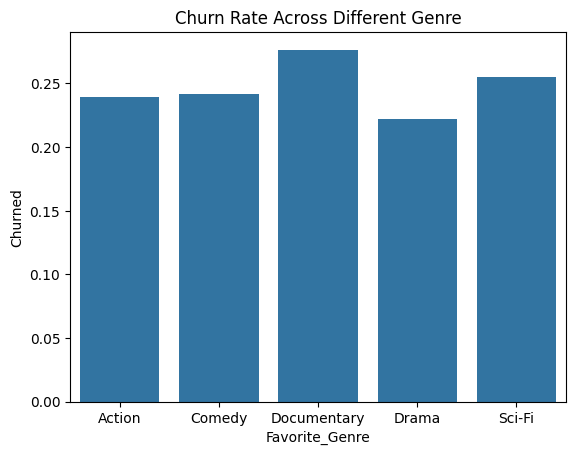

In [445]:
churn_rate = df.groupby('Favorite_Genre')['Churned'].mean().reset_index()
sns.barplot(data=churn_rate, x='Favorite_Genre', y='Churned')
plt.title('Churn Rate Across Different Genre')
plt.show()

In [446]:
#identify all the churned information
Churned_data=df[df['Churned'] ==1]
UnChurned_data=df[df['Churned'] ==0]


In [447]:
print ("Churned: %i (%.1f%%)"%(len(Churned_data), float(len(Churned_data))/len(df)*100.0))
print ("UnChurned: %i (%.1f%%)"%(len(UnChurned_data), float(len(UnChurned_data))/len(df)*100.0))
print ("Total: %i"%len(df))

Churned: 246 (24.6%)
UnChurned: 754 (75.4%)
Total: 1000


In [448]:
#Churned vs Subscription_Type
df.Subscription_Type.value_counts()

Subscription_Type
Standard    530
Basic       276
Premium     194
Name: count, dtype: int64

In [449]:
df.groupby('Subscription_Type').Churned.value_counts()

Subscription_Type  Churned
Basic              0          203
                   1           73
Premium            0          145
                   1           49
Standard           0          406
                   1          124
Name: count, dtype: int64

In [450]:
df[['Subscription_Type', 'Churned']].groupby(['Subscription_Type'], as_index=False).mean()

,Subscription_Type,Churned
0,Basic,0.264493
1,Premium,0.252577
2,Standard,0.233962


<Axes: xlabel='Subscription_Type', ylabel='Churned'>

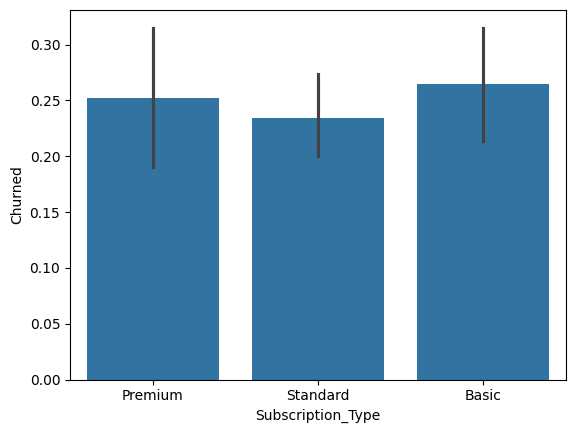

In [451]:
sns.barplot(x='Subscription_Type', y='Churned', data=df)

In [452]:
#Churned vs Devices_Used
df.Devices_Used.value_counts()


Devices_Used
Mobile    408
Tablet    217
TV        201
PC        174
Name: count, dtype: int64

In [453]:
df.groupby('Devices_Used').Churned.value_counts()


Devices_Used  Churned
Mobile        0          277
              1          131
PC            0          147
              1           27
TV            0          157
              1           44
Tablet        0          173
              1           44
Name: count, dtype: int64

In [454]:
df[['Devices_Used', 'Churned']].groupby(['Devices_Used'], as_index=False).mean()


,Devices_Used,Churned
0,Mobile,0.321078
1,PC,0.155172
2,TV,0.218905
3,Tablet,0.202765


<Axes: xlabel='Devices_Used', ylabel='Churned'>

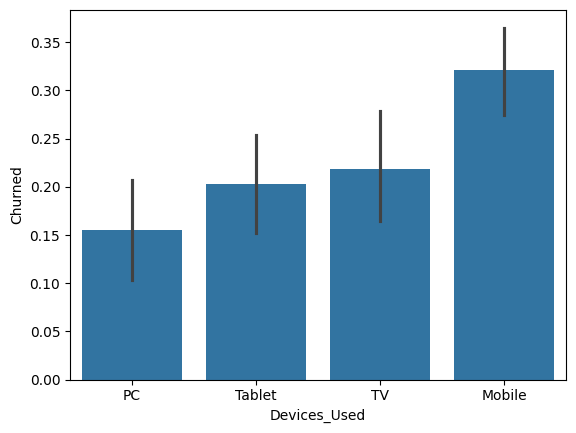

In [455]:
sns.barplot(x='Devices_Used', y='Churned', data=df)

In [456]:
#Churned vs Location
df.Location.value_counts()

Location
West       216
North      204
Central    201
East       200
South      179
Name: count, dtype: int64

In [457]:
df.groupby('Location').Churned.value_counts()


Location  Churned
Central   0          154
          1           47
East      0          140
          1           60
North     0          151
          1           53
South     0          137
          1           42
West      0          172
          1           44
Name: count, dtype: int64

In [458]:
df[['Location', 'Churned']].groupby(['Location'], as_index=False).mean()


,Location,Churned
0,Central,0.233831
1,East,0.300000
2,North,0.259804
3,South,0.234637
4,West,0.203704


<Axes: xlabel='Location', ylabel='Churned'>

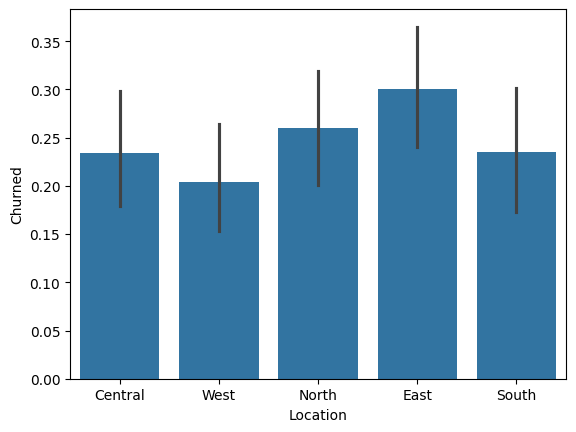

In [459]:
sns.barplot(x='Location', y='Churned', data=df)

In [462]:
tab = pd.crosstab(df['Location'], df['Favorite_Genre'])
print (tab)

Favorite_Genre  Action  Comedy  Documentary  Drama  Sci-Fi
Location                                                  
Central             40      51           31     46      33
East                41      36           44     47      32
North               46      38           44     35      41
South               37      37           30     33      42
West                41      41           39     51      44


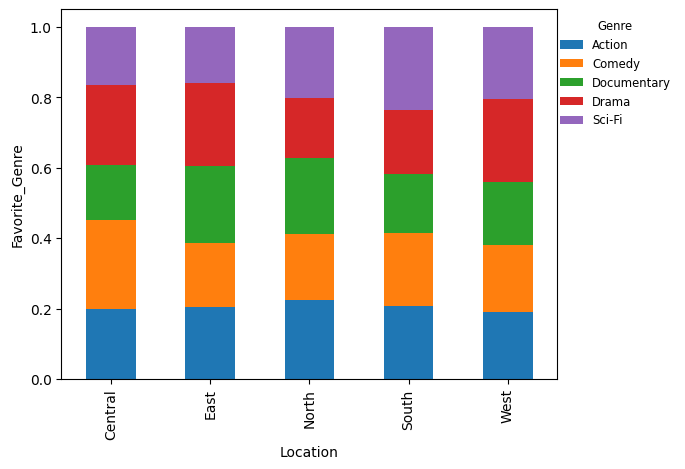

In [474]:
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.ylabel('Favorite_Genre')
plt.xlabel('Location')
plt.legend(title='Genre', loc='upper right', fontsize='small',bbox_to_anchor=(1.25, 1),title_fontsize='small', frameon=False)


<Axes: xlabel='Location', ylabel='Age'>

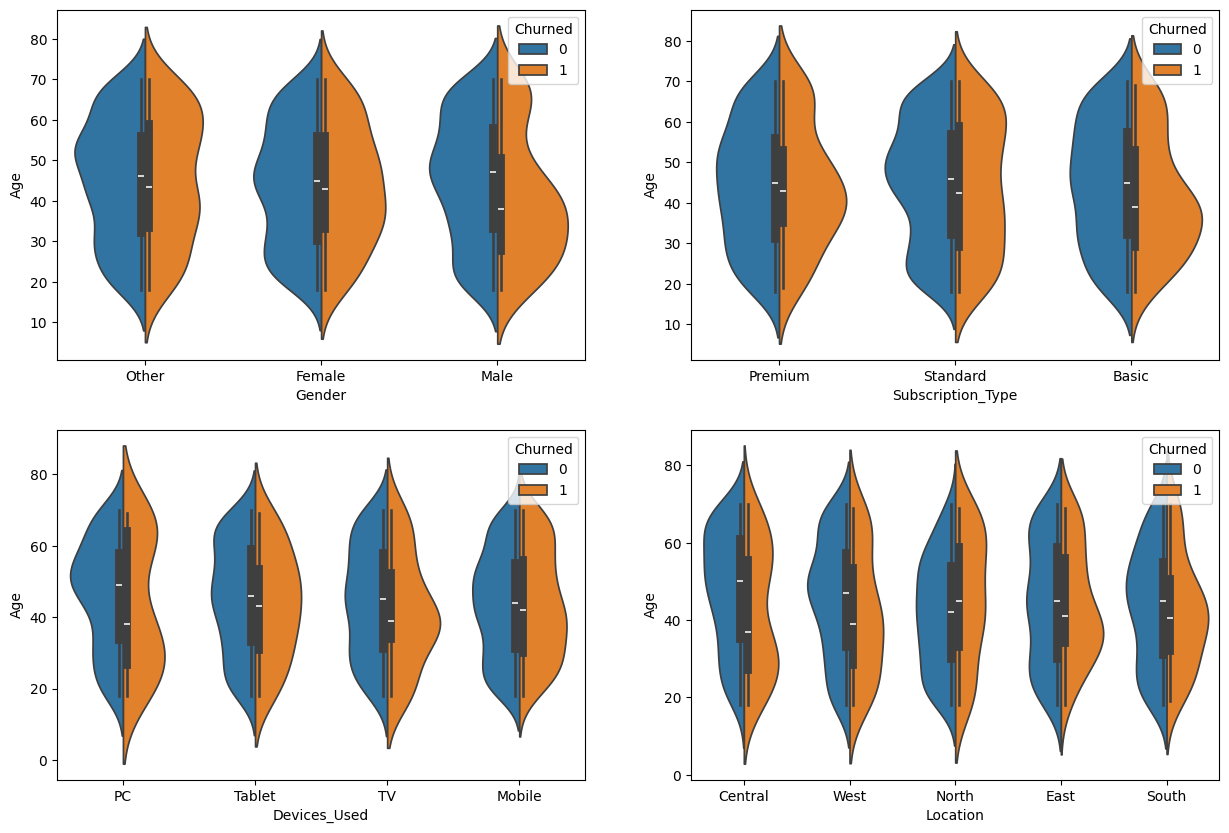

In [429]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)



sns.violinplot(x="Gender", y="Age", hue="Churned", data=df, split=True, ax=ax1)
sns.violinplot(x="Subscription_Type", y="Age", hue="Churned", data=df, split=True, ax=ax2)
sns.violinplot(x="Devices_Used", y="Age", hue="Churned", data=df, split=True, ax=ax3)
sns.violinplot(x="Location", y="Age", hue="Churned", data=df, split=True, ax=ax4)

In [430]:

reason_for_churn = Churned_data['Reason_for_Churn']

print(reason_for_churn.describe())

reason_counts = reason_for_churn.value_counts()
print(reason_counts)




count                246
unique                 4
top       Price increase
freq                  68
Name: Reason_for_Churn, dtype: object
Reason_for_Churn
Price increase               68
Found better service         64
Personal reasons             62
Dissatisfied with content    52
Name: count, dtype: int64


In [431]:
df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Payment_per_Hour
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN,0.634338
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN,3.008664
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN,3.642812
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN,0.248818
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN,3.181337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service,14.267787
996,997,66,Female,West,2020-05-06 01:53:37.667895,Standard,14.99,Credit Card,20.153308,Action,Mobile,3.222521,1069,4,0,NaN,NaN,0.743798
997,998,52,Other,South,2019-06-19 01:53:37.667906,Standard,14.99,PayPal,39.170314,Drama,PC,1.221380,1079,1,0,NaN,NaN,0.382688
998,999,69,Male,East,2020-11-13 01:53:37.667917,Standard,14.99,Credit Card,8.455372,Sci-Fi,Mobile,1.865411,1092,2,1,2021-04-05 01:53:37.667917,Found better service,1.772837


In [432]:
#In this section, we analyze relationship between different features with respect to Survival. We see how different feature values show different survival chance. We also plot different kinds of diagrams to visualize our data and findings.
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

Non-numeric columns: Index(['Gender', 'Location', 'Subscription_Start_Date', 'Subscription_Type',
       'Payment_Method', 'Favorite_Genre', 'Devices_Used', 'Date_of_Churn',
       'Reason_for_Churn'],
      dtype='object')


In [433]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

In [434]:
df.dtypes

User_ID                      int64
Age                          int64
Gender                       int64
Location                     int64
Subscription_Start_Date      int64
Subscription_Type            int64
Monthly_Payment            float64
Payment_Method               int64
Monthly_Hours_Watched      float64
Favorite_Genre               int64
Devices_Used                 int64
Average_Session_Length     float64
Content_ID                   int64
Rating_Given                 int64
Churned                      int64
Date_of_Churn                int64
Reason_for_Churn             int64
Payment_per_Hour           float64
dtype: object

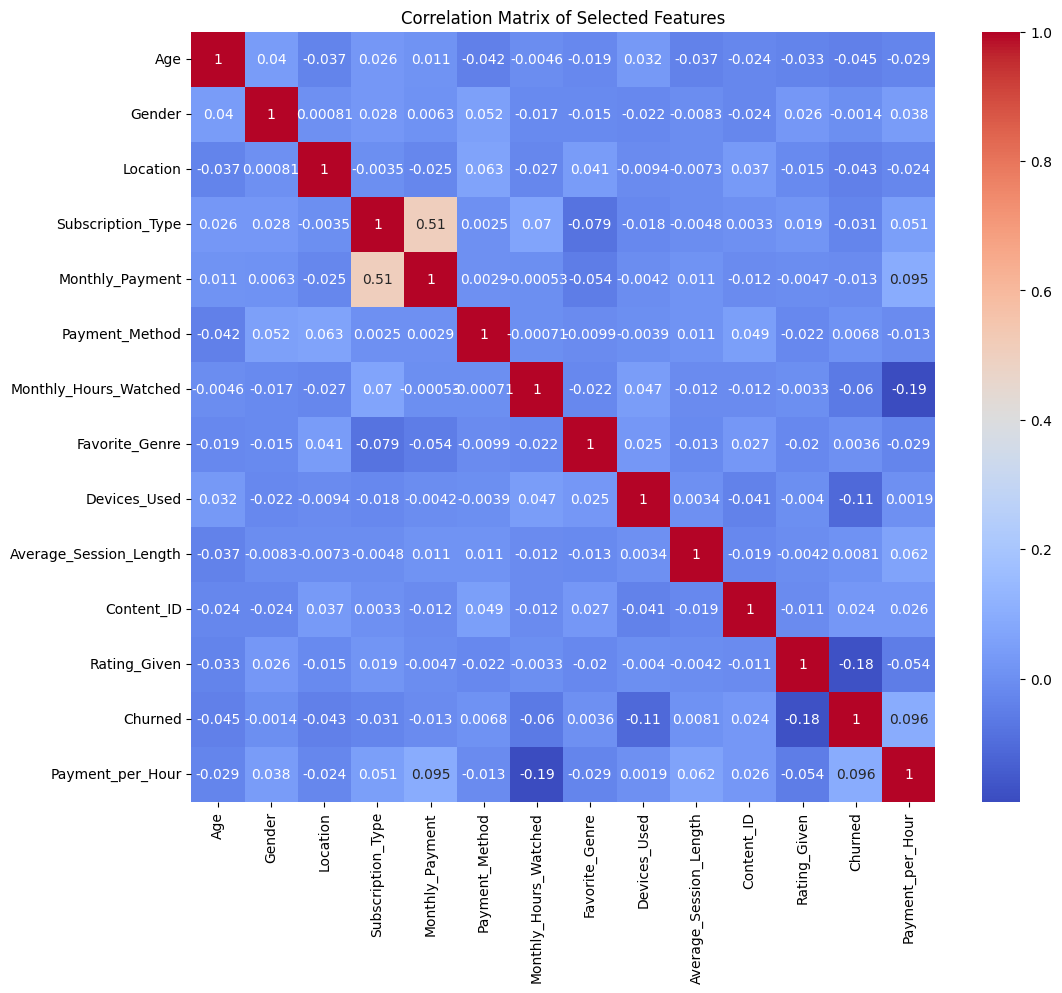

In [435]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(columns=['User_ID','Subscription_Start_Date','Date_of_Churn','Reason_for_Churn'],axis=1).corr(), annot=True,cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [478]:
df_numeric = df.select_dtypes(include=[float, int])

corr_matrix = df_numeric.corr()

churn_corr = corr_matrix['Churned'].sort_values(ascending=False)
print("Variables most positively correlated with Churn:\n", churn_corr.head())
print("Variables most negatively correlated with Churn:\n", churn_corr.tail())

Variables most positively correlated with Churn:
 Churned                   1.000000
Payment_per_Hour          0.096454
Content_ID                0.024253
User_ID                   0.009620
Average_Session_Length    0.008055
Name: Churned, dtype: float64
Variables most negatively correlated with Churn:
 Average_Session_Length    0.008055
Monthly_Payment          -0.013059
Age                      -0.045139
Monthly_Hours_Watched    -0.060233
Rating_Given             -0.175378
Name: Churned, dtype: float64
